## Gradient Descent Implementation #3
Here we attempt to use our basic implementation of gradient descent to estimate parameters of a 3rd degree polynomial.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing

%matplotlib inline

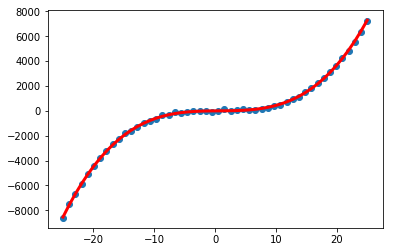

In [4]:
n = 50
xs = np.linspace(-25, 25, n)
x = np.stack([np.ones(n),
              xs,
              xs**2,
              xs**3], axis=1)

expected_thetas = np.array([-2., 4., -1., .5])

y = x @ expected_thetas + np.random.normal(0,50,n)

plt.scatter(xs,y)
plt.plot(xs, x @ expected_thetas, linewidth=3, color='red')
plt.show()

The analytic solution $(x^Tx)^{-1}x^Ty$ is as follows:

In [5]:
analytic_thetas = np.linalg.inv(x.T @ x) @ x.T @ y

final cost:       41374.44607653938
actual params:    [-2.   4.  -1.   0.5]
analytic params:  [ 6.39914467  3.87625825 -1.04197497  0.49903838]
estimated params: [   0.          497.43459678 -201.964096   2686.5767046 ]


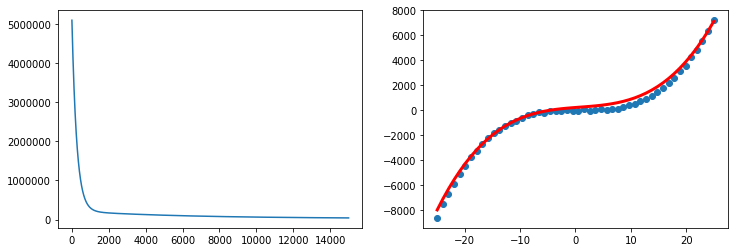

In [6]:
learning_rate = 1e-3
iterations = 15000
num_params = 4

def cost(error):
    N = len(error)
    return .5 * 1. / N * error.dot(error)

x_scaled = preprocessing.scale(x)
thetas = np.zeros(num_params)
costs = []

for _ in range(iterations):
    yp = x_scaled @ thetas
    error = yp - y
    costs.append(cost(error))
    gradient = 1. / n * (error @ x_scaled)
    thetas -= learning_rate * gradient

print("final cost:      ", costs[-1])
print("actual params:   ", expected_thetas)
print("analytic params: ", analytic_thetas)
print("estimated params:", thetas)

f = plt.figure(figsize=(12,4))
ax = f.add_subplot(121)
ax2 = f.add_subplot(122)

ax.plot(costs)

ax2.scatter(xs, y)
ax2.plot(xs, x_scaled @ thetas, linewidth=3, color='red')

plt.show()